In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [25]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [26]:
# Separate X and Y. 
X = df.iloc[:, :-1] # All rows, all columns except last
y = df.iloc[:, -1]  # All rows, only the last column

In [27]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [28]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

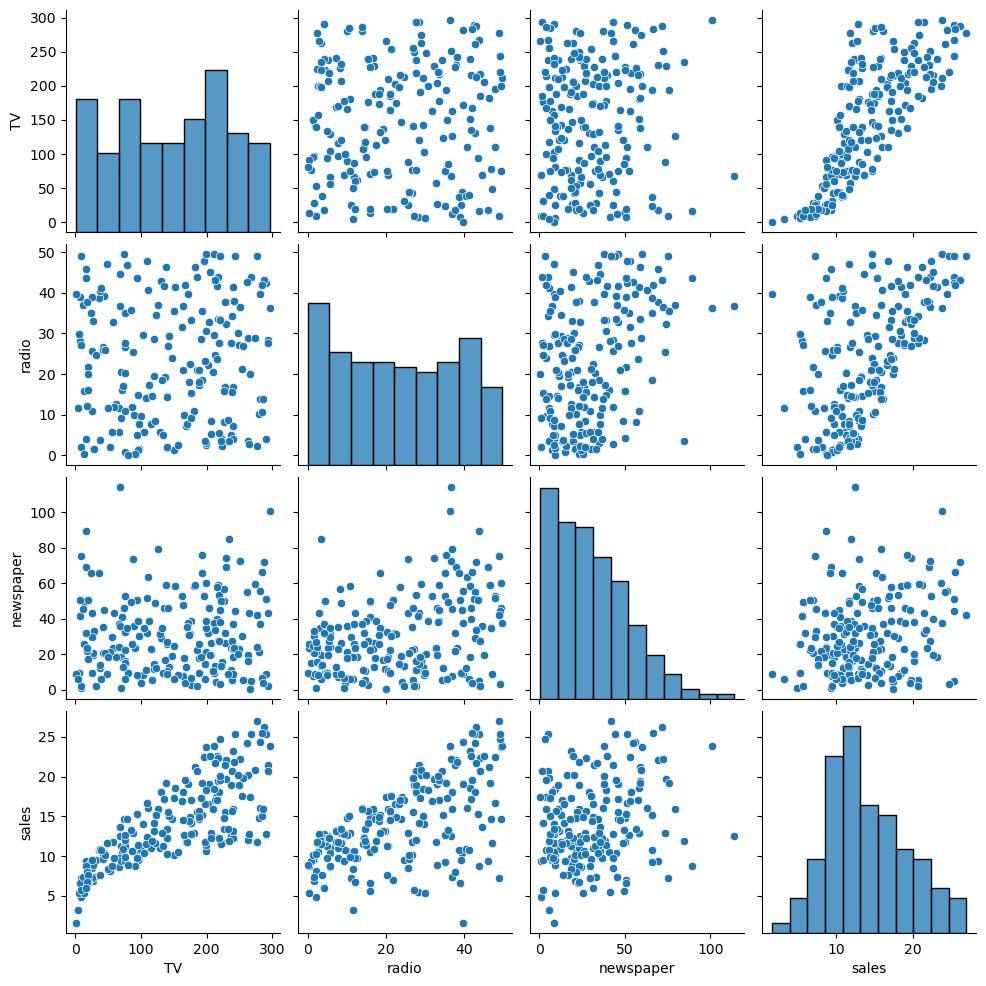

In [29]:
# Pairplot - View all relationships at once
sns.pairplot(df)
plt.show()

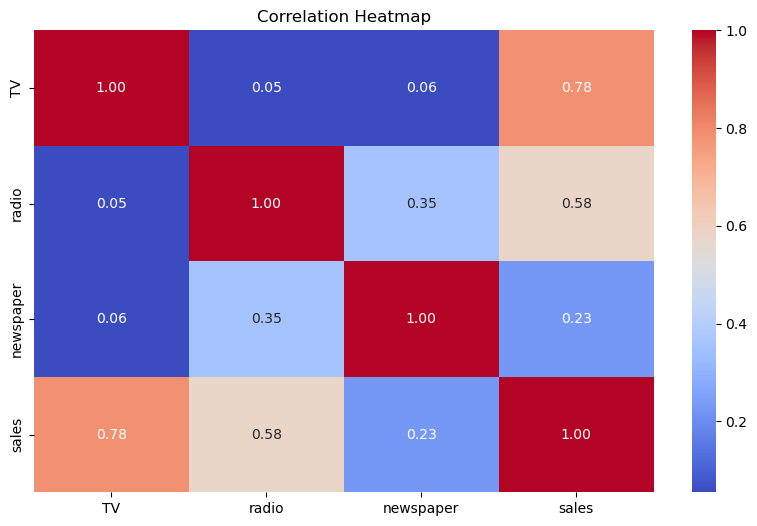

In [30]:
# To check feature correlations visually.
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

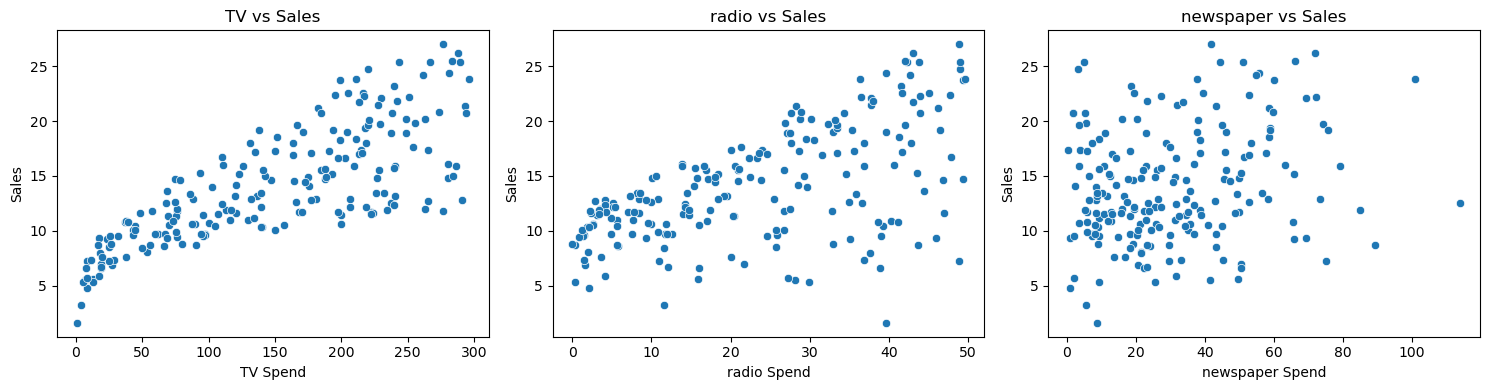

In [39]:
# Scatter Plot of Target vs Features

features = ['TV', 'radio', 'newspaper']

df.columns = df.columns.str.strip()

fig, axs =  plt.subplots(1, 3, figsize=(15, 4))  # 1 row, 3 columns

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='sales', data=df, ax=axs[i])
    axs[i].set_title(f'{feature} vs Sales')
    axs[i].set_xlabel(f'{feature} Spend')
    axs[i].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [42]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [43]:
# Fit the model. 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

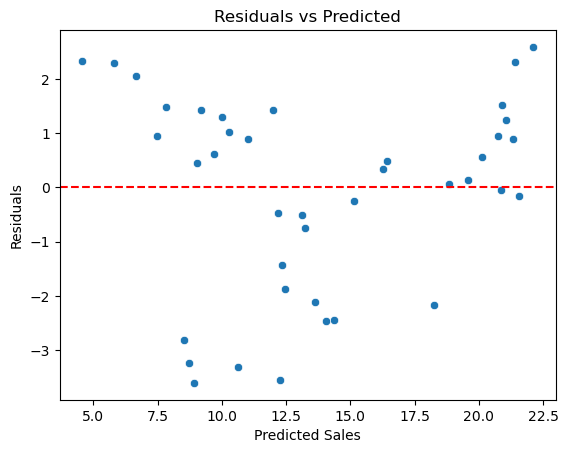

In [47]:
# Now, Plots the residuals.
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

# Assumptions of Linear Regression.

### 1. Linearity

In order to apply LR, there should be a linear relationships between independent variables and dependent variables. The model assumes that changed in the independent variables leads to proportional changes in the dependent variables

---
What happens when this assumptions is violated ?
---
a. `Bias is parameter estimates:` 
    when true relationships is not linear, the estimated regression coefficients can be biased, leading to incorrect inferences, about the relationships between the independent and dependent variables. 

b. `Reduced predictive accuracy:`
    A mis specified linear model not accurately capture the underlying relationships, which can result in poor predictive performance. The model might uderfit the data, missing important patterns and trends. 

c. `Invalid hypothesis tests and confidence intervals:` 
    The violation of the linearity assumption can affect the validity of hypothesis tests and confidence intervals, leading to incorrect inferences about the significance of the independent variables and the effect sizes. 

---
How to check this assumptions:
---

1. `Scatter plot:`
    Create scatter plots of the `dependent variable` against each indepdent variable. If the relationships appears to be linear, the linearity assumption is likey satisfied. Non-linear patterns or other trends may indicate that the assumptions is violated. 

2. `Residual plots:` 
    Plot the residuals (the differences between the `observed` and `predicted` values) against the `predicted values` or against each `independent variable`. If the linearity assumption holds, the residuals should be randomly scattered around zero, with no discernible pattern. Any trends, curvature, or heteroscedasticity in the residual plots suggest that the linearity assumption may be violated.

3. `Polynomial terms:` 
    Add `polynomial` terms to our model and compare the model fit with the original linear model. If the new model with additional terms significantly improves the fit, it may suggest that the linearity assumption is violated.

---
What to do when the assumption fails ?
---
1. `Transformations:`
    Transformations: Apply transformations to the dependent and/or independent variables to make their relationship more linear. Common transformations include logarithmic, square root, and inverse transformations.

2. `Polynomial regression:` 
    Add polynomial terms of the independent variables to the model to capture non-linear relationships.

3. `Piecewise regression:` 
    Divide the range of the independent variable into segments and fit separate linear models to each segment.

4. `Non-parametric or semi-parametric methods:` 
    Consider using non-parametric or semi-parametric methods that do not rely on the linearity assumption, such as generalized additive models (GAMs), splines, or kernel regression.

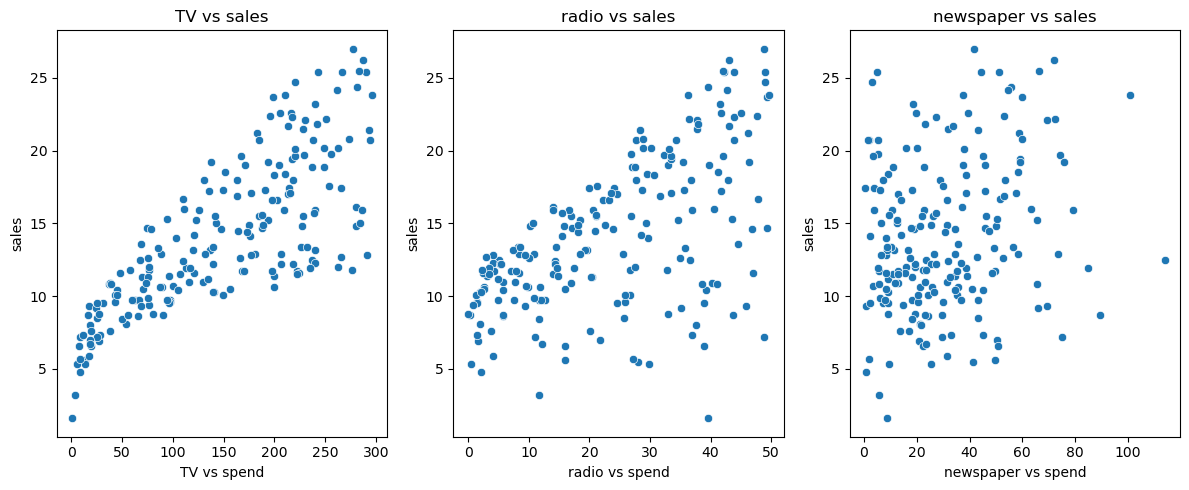

In [52]:
fig, (axs) = plt.subplots(1, 3, figsize=(12, 5))

for i, feature in enumerate(features):
    sns.scatterplot(x=feature, y='sales', data=df, ax=axs[i])
    axs[i].set_title(f"{feature} vs sales")
    axs[i].set_xlabel(f'{feature} vs spend')
    axs[i].set_ylabel('sales')

plt.tight_layout()

# saving the plot. 
plt.savefig("advertising_scatterplots_assumption1_lr.png", dpi=300)
plt.show()

In [60]:
y_test.shape, y_pred.shape

((40,), (40,))

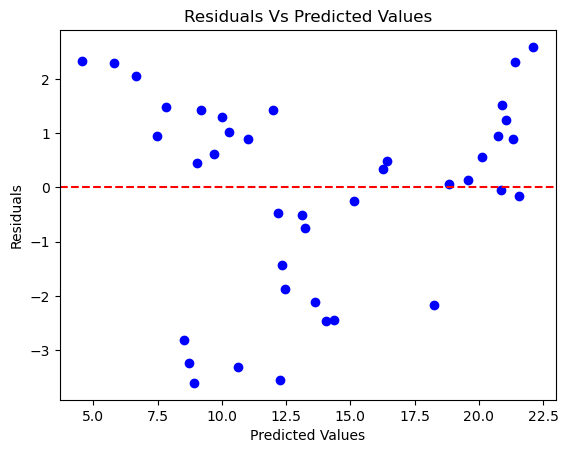

In [61]:
# Assumption 1 : Residual Plots. 
model = LinearRegression()
model.fit(X_train, y_train)

# Calculated the predicted values and residuals. 
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# Plots residuals against predicted values. 
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red',linestyle='--')
plt.title("Residuals Vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

plt.savefig("residuals_plots_assumptions1.png", dpi=300)
plt.show()

In [ ]:
# Assumptions 1  - Adding Polynomial Term. 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Calculating r2_score.
lr_r2_score = r2_score(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)

# Fitting a Polynomial model.
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare the model performance. 
print("Linear Model")
print(f"R-squared: {lr_r2_score: .4f}")
print(f"Mean Squared Error: {lr_mse: .4f}")

print("Polynomial Model")
print(f"R-squared: {poly_r2: .4f}")
print(f"Mean Squared Error: {poly_mse: .4f}")

Linear Model
R-squared:  0.8994
Mean Squared Error:  3.1741
Polynomial Model
R-squared:  0.9869
Mean Squared Error:  0.4129


In [ ]:
# since, r2-squred is incresed with polynomial regression means that dataset have non-linearity.